In [3]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet")
import dense_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'dense_unet_30ep_64_aG'
INPUT_SHAPE = (512, 512, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'

2024-01-30 07:17:40.672729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 07:17:40.672757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 07:17:40.673656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 07:17:40.678753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 07:17:41.229606: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_adaptive()
test_preproc = preprocess.build_augmentation_for_adaptive(is_train=False)

# Create train, test generator
train_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=2,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.AdaptiveDataGenerator(
    SOURCE, 
    number_of_images=2,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model()

2024-01-30 05:32:51.360831: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 05:32:51.397636: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-30 05:32:51.397884: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)


Epoch 00001: WeightDecayScheduler setting learning rate to 9.999899747381279e-05.
Epoch 1/30


2024-01-30 05:32:57.189453: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-30 05:32:59.487850: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa884d0fe00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-30 05:32:59.487869: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-01-30 05:32:59.494764: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706592779.567965     751 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


441/441 [==============================] - ETA: 0s - loss: 0.4727 - sensitivity: 0.5348 - specificity: 0.9569 - accuracy: 0.9297INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/1--0.4727-0.5348-0.9569-0.1606-0.9947.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/1--0.4727-0.5348-0.9569-0.1606-0.9947.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/1--0.4727-0.5348-0.9569-0.1606-0.9947.pb
441/441 [==============================] - 172s 363ms/step - loss: 0.4727 - sensitivity: 0.5348 - specificity: 0.9569 - accuracy: 0.9297 - val_loss: 0.6013 - val_sensitivity: 0.1606 - val_specificity: 0.9947 - val_accuracy: 0.9374

Epoch 00002: WeightDecayScheduler setting learning rate to 9.99980006775877e-05.
Epoch 2/30
441/441 [==============================] - ETA: 0s - loss: 0.3711 - sensitivity: 0.6117 - specificity: 0.9705 - accuracy: 0.9459INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/2--0.3711-0.6117-0.9705-0.5574-0.9698.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/2--0.3711-0.6117-0.9705-0.5574-0.9698.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/2--0.3711-0.6117-0.9705-0.5574-0.9698.pb
441/441 [==============================] - 153s 347ms/step - loss: 0.3711 - sensitivity: 0.6117 - specificity: 0.9705 - accuracy: 0.9459 - val_loss: 0.4171 - val_sensitivity: 0.5574 - val_specificity: 0.9698 - val_accuracy: 0.9440

Epoch 00003: WeightDecayScheduler setting learning rate to 9.999700388136262e-05.
Epoch 3/30
441/441 [==============================] - ETA: 0s - loss: 0.3507 - sensitivity: 0.6235 - specificity: 0.9718 - accuracy: 0.9489INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/3--0.3507-0.6235-0.9718-0.5304-0.9789.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/3--0.3507-0.6235-0.9718-0.5304-0.9789.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/3--0.3507-0.6235-0.9718-0.5304-0.9789.pb
441/441 [==============================] - 152s 345ms/step - loss: 0.3507 - sensitivity: 0.6235 - specificity: 0.9718 - accuracy: 0.9489 - val_loss: 0.3836 - val_sensitivity: 0.5304 - val_specificity: 0.9789 - val_accuracy: 0.9516

Epoch 00004: WeightDecayScheduler setting learning rate to 9.999600708513754e-05.
Epoch 4/30
441/441 [==============================] - ETA: 0s - loss: 0.3306 - sensitivity: 0.6389 - specificity: 0.9750 - accuracy: 0.9535INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/4--0.3306-0.6389-0.9750-0.6391-0.9706.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/4--0.3306-0.6389-0.9750-0.6391-0.9706.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/4--0.3306-0.6389-0.9750-0.6391-0.9706.pb
441/441 [==============================] - 158s 358ms/step - loss: 0.3306 - sensitivity: 0.6389 - specificity: 0.9750 - accuracy: 0.9535 - val_loss: 0.3313 - val_sensitivity: 0.6391 - val_specificity: 0.9706 - val_accuracy: 0.9505

Epoch 00005: WeightDecayScheduler setting learning rate to 9.999501028891246e-05.
Epoch 5/30
441/441 [==============================] - ETA: 0s - loss: 0.3342 - sensitivity: 0.6422 - specificity: 0.9740 - accuracy: 0.9524INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/5--0.3342-0.6422-0.9740-0.7071-0.9394.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/5--0.3342-0.6422-0.9740-0.7071-0.9394.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/5--0.3342-0.6422-0.9740-0.7071-0.9394.pb
441/441 [==============================] - 146s 331ms/step - loss: 0.3342 - sensitivity: 0.6422 - specificity: 0.9740 - accuracy: 0.9524 - val_loss: 0.3750 - val_sensitivity: 0.7071 - val_specificity: 0.9394 - val_accuracy: 0.9271

Epoch 00006: WeightDecayScheduler setting learning rate to 9.999401349268737e-05.
Epoch 6/30
441/441 [==============================] - ETA: 0s - loss: 0.3260 - sensitivity: 0.6431 - specificity: 0.9762 - accuracy: 0.9548INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/6--0.3260-0.6431-0.9762-0.6540-0.9717.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/6--0.3260-0.6431-0.9762-0.6540-0.9717.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/6--0.3260-0.6431-0.9762-0.6540-0.9717.pb
441/441 [==============================] - 153s 346ms/step - loss: 0.3260 - sensitivity: 0.6431 - specificity: 0.9762 - accuracy: 0.9548 - val_loss: 0.3238 - val_sensitivity: 0.6540 - val_specificity: 0.9717 - val_accuracy: 0.9527

Epoch 00007: WeightDecayScheduler setting learning rate to 9.999301669646229e-05.
Epoch 7/30
441/441 [==============================] - ETA: 0s - loss: 0.3101 - sensitivity: 0.6586 - specificity: 0.9753 - accuracy: 0.9548INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/7--0.3101-0.6586-0.9753-0.5795-0.9806.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/7--0.3101-0.6586-0.9753-0.5795-0.9806.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/7--0.3101-0.6586-0.9753-0.5795-0.9806.pb
441/441 [==============================] - 153s 347ms/step - loss: 0.3101 - sensitivity: 0.6586 - specificity: 0.9753 - accuracy: 0.9548 - val_loss: 0.3313 - val_sensitivity: 0.5795 - val_specificity: 0.9806 - val_accuracy: 0.9559

Epoch 00008: WeightDecayScheduler setting learning rate to 9.999201990023722e-05.
Epoch 8/30
441/441 [==============================] - ETA: 0s - loss: 0.3081 - sensitivity: 0.6525 - specificity: 0.9771 - accuracy: 0.9558INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/8--0.3081-0.6525-0.9771-0.6379-0.9711.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/8--0.3081-0.6525-0.9771-0.6379-0.9711.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/8--0.3081-0.6525-0.9771-0.6379-0.9711.pb
441/441 [==============================] - 158s 358ms/step - loss: 0.3081 - sensitivity: 0.6525 - specificity: 0.9771 - accuracy: 0.9558 - val_loss: 0.3345 - val_sensitivity: 0.6379 - val_specificity: 0.9711 - val_accuracy: 0.9528

Epoch 00009: WeightDecayScheduler setting learning rate to 9.999102310401214e-05.
Epoch 9/30
441/441 [==============================] - ETA: 0s - loss: 0.3003 - sensitivity: 0.6638 - specificity: 0.9781 - accuracy: 0.9583INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/9--0.3003-0.6638-0.9781-0.6376-0.9756.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/9--0.3003-0.6638-0.9781-0.6376-0.9756.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/9--0.3003-0.6638-0.9781-0.6376-0.9756.pb
441/441 [==============================] - 156s 355ms/step - loss: 0.3003 - sensitivity: 0.6638 - specificity: 0.9781 - accuracy: 0.9583 - val_loss: 0.3137 - val_sensitivity: 0.6376 - val_specificity: 0.9756 - val_accuracy: 0.9538

Epoch 00010: WeightDecayScheduler setting learning rate to 9.999002630778705e-05.
Epoch 10/30
441/441 [==============================] - ETA: 0s - loss: 0.3087 - sensitivity: 0.6544 - specificity: 0.9782 - accuracy: 0.9579INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/10--0.3087-0.6544-0.9782-0.6387-0.9776.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/10--0.3087-0.6544-0.9782-0.6387-0.9776.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/10--0.3087-0.6544-0.9782-0.6387-0.9776.pb
441/441 [==============================] - 153s 348ms/step - loss: 0.3087 - sensitivity: 0.6544 - specificity: 0.9782 - accuracy: 0.9579 - val_loss: 0.3056 - val_sensitivity: 0.6387 - val_specificity: 0.9776 - val_accuracy: 0.9570

Epoch 00011: WeightDecayScheduler setting learning rate to 9.998902951156197e-05.
Epoch 11/30
441/441 [==============================] - ETA: 0s - loss: 0.3077 - sensitivity: 0.6498 - specificity: 0.9776 - accuracy: 0.9569INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/11--0.3077-0.6498-0.9776-0.5988-0.9811.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/11--0.3077-0.6498-0.9776-0.5988-0.9811.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/11--0.3077-0.6498-0.9776-0.5988-0.9811.pb
441/441 [==============================] - 158s 358ms/step - loss: 0.3077 - sensitivity: 0.6498 - specificity: 0.9776 - accuracy: 0.9569 - val_loss: 0.3281 - val_sensitivity: 0.5988 - val_specificity: 0.9811 - val_accuracy: 0.9589

Epoch 00012: WeightDecayScheduler setting learning rate to 9.998803271533689e-05.
Epoch 12/30
441/441 [==============================] - ETA: 0s - loss: 0.2931 - sensitivity: 0.6647 - specificity: 0.9792 - accuracy: 0.9596INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/12--0.2931-0.6647-0.9792-0.6287-0.9801.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/12--0.2931-0.6647-0.9792-0.6287-0.9801.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/12--0.2931-0.6647-0.9792-0.6287-0.9801.pb
441/441 [==============================] - 154s 350ms/step - loss: 0.2931 - sensitivity: 0.6647 - specificity: 0.9792 - accuracy: 0.9596 - val_loss: 0.3029 - val_sensitivity: 0.6287 - val_specificity: 0.9801 - val_accuracy: 0.9588

Epoch 00013: WeightDecayScheduler setting learning rate to 9.99870359191118e-05.
Epoch 13/30
441/441 [==============================] - ETA: 0s - loss: 0.3102 - sensitivity: 0.6527 - specificity: 0.9782 - accuracy: 0.9588INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/13--0.3102-0.6527-0.9782-0.6693-0.9719.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/13--0.3102-0.6527-0.9782-0.6693-0.9719.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/13--0.3102-0.6527-0.9782-0.6693-0.9719.pb
441/441 [==============================] - 155s 350ms/step - loss: 0.3102 - sensitivity: 0.6527 - specificity: 0.9782 - accuracy: 0.9588 - val_loss: 0.3168 - val_sensitivity: 0.6693 - val_specificity: 0.9719 - val_accuracy: 0.9546

Epoch 00014: WeightDecayScheduler setting learning rate to 9.998603912288672e-05.
Epoch 14/30
441/441 [==============================] - ETA: 0s - loss: 0.2808 - sensitivity: 0.6809 - specificity: 0.9782 - accuracy: 0.9584INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/14--0.2808-0.6809-0.9782-0.6081-0.9810.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/14--0.2808-0.6809-0.9782-0.6081-0.9810.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/14--0.2808-0.6809-0.9782-0.6081-0.9810.pb
441/441 [==============================] - 157s 355ms/step - loss: 0.2808 - sensitivity: 0.6809 - specificity: 0.9782 - accuracy: 0.9584 - val_loss: 0.3211 - val_sensitivity: 0.6081 - val_specificity: 0.9810 - val_accuracy: 0.9588

Epoch 00015: WeightDecayScheduler setting learning rate to 9.998504232666165e-05.
Epoch 15/30
441/441 [==============================] - ETA: 0s - loss: 0.2805 - sensitivity: 0.6753 - specificity: 0.9800 - accuracy: 0.9603INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/15--0.2805-0.6753-0.9800-0.7019-0.9683.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/15--0.2805-0.6753-0.9800-0.7019-0.9683.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/15--0.2805-0.6753-0.9800-0.7019-0.9683.pb
441/441 [==============================] - 148s 336ms/step - loss: 0.2805 - sensitivity: 0.6753 - specificity: 0.9800 - accuracy: 0.9603 - val_loss: 0.3066 - val_sensitivity: 0.7019 - val_specificity: 0.9683 - val_accuracy: 0.9532

Epoch 00016: WeightDecayScheduler setting learning rate to 9.998404553043657e-05.
Epoch 16/30
441/441 [==============================] - ETA: 0s - loss: 0.2939 - sensitivity: 0.6663 - specificity: 0.9786 - accuracy: 0.9592INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/16--0.2939-0.6663-0.9786-0.6713-0.9724.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/16--0.2939-0.6663-0.9786-0.6713-0.9724.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/16--0.2939-0.6663-0.9786-0.6713-0.9724.pb
441/441 [==============================] - 159s 360ms/step - loss: 0.2939 - sensitivity: 0.6663 - specificity: 0.9786 - accuracy: 0.9592 - val_loss: 0.3120 - val_sensitivity: 0.6713 - val_specificity: 0.9724 - val_accuracy: 0.9536

Epoch 00017: WeightDecayScheduler setting learning rate to 9.998304873421149e-05.
Epoch 17/30
441/441 [==============================] - ETA: 0s - loss: 0.2841 - sensitivity: 0.6718 - specificity: 0.9804 - accuracy: 0.9618INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/17--0.2841-0.6718-0.9804-0.6594-0.9775.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/17--0.2841-0.6718-0.9804-0.6594-0.9775.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/17--0.2841-0.6718-0.9804-0.6594-0.9775.pb
441/441 [==============================] - 160s 364ms/step - loss: 0.2841 - sensitivity: 0.6718 - specificity: 0.9804 - accuracy: 0.9618 - val_loss: 0.2978 - val_sensitivity: 0.6594 - val_specificity: 0.9775 - val_accuracy: 0.9579

Epoch 00018: WeightDecayScheduler setting learning rate to 9.99820519379864e-05.
Epoch 18/30
441/441 [==============================] - ETA: 0s - loss: 0.2842 - sensitivity: 0.6698 - specificity: 0.9798 - accuracy: 0.9610INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/18--0.2842-0.6698-0.9798-0.5764-0.9848.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/18--0.2842-0.6698-0.9798-0.5764-0.9848.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/18--0.2842-0.6698-0.9798-0.5764-0.9848.pb
441/441 [==============================] - 149s 338ms/step - loss: 0.2842 - sensitivity: 0.6698 - specificity: 0.9798 - accuracy: 0.9610 - val_loss: 0.3198 - val_sensitivity: 0.5764 - val_specificity: 0.9848 - val_accuracy: 0.9609

Epoch 00019: WeightDecayScheduler setting learning rate to 9.998105514176132e-05.
Epoch 19/30
441/441 [==============================] - ETA: 0s - loss: 0.2871 - sensitivity: 0.6678 - specificity: 0.9792 - accuracy: 0.9597INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/19--0.2871-0.6678-0.9792-0.7018-0.9704.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/19--0.2871-0.6678-0.9792-0.7018-0.9704.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/19--0.2871-0.6678-0.9792-0.7018-0.9704.pb
441/441 [==============================] - 147s 335ms/step - loss: 0.2871 - sensitivity: 0.6678 - specificity: 0.9792 - accuracy: 0.9597 - val_loss: 0.2891 - val_sensitivity: 0.7018 - val_specificity: 0.9704 - val_accuracy: 0.9541

Epoch 00020: WeightDecayScheduler setting learning rate to 9.998005834553624e-05.
Epoch 20/30
441/441 [==============================] - ETA: 0s - loss: 0.2640 - sensitivity: 0.6945 - specificity: 0.9799 - accuracy: 0.9613INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/20--0.2640-0.6945-0.9799-0.6498-0.9772.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/20--0.2640-0.6945-0.9799-0.6498-0.9772.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/20--0.2640-0.6945-0.9799-0.6498-0.9772.pb
441/441 [==============================] - 154s 350ms/step - loss: 0.2640 - sensitivity: 0.6945 - specificity: 0.9799 - accuracy: 0.9613 - val_loss: 0.3024 - val_sensitivity: 0.6498 - val_specificity: 0.9772 - val_accuracy: 0.9573

Epoch 00021: WeightDecayScheduler setting learning rate to 9.997906154931117e-05.
Epoch 21/30
441/441 [==============================] - ETA: 0s - loss: 0.2827 - sensitivity: 0.6710 - specificity: 0.9796 - accuracy: 0.9601INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/21--0.2827-0.6710-0.9796-0.6781-0.9705.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/21--0.2827-0.6710-0.9796-0.6781-0.9705.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/21--0.2827-0.6710-0.9796-0.6781-0.9705.pb
441/441 [==============================] - 154s 348ms/step - loss: 0.2827 - sensitivity: 0.6710 - specificity: 0.9796 - accuracy: 0.9601 - val_loss: 0.3127 - val_sensitivity: 0.6781 - val_specificity: 0.9705 - val_accuracy: 0.9533

Epoch 00022: WeightDecayScheduler setting learning rate to 9.997806475308608e-05.
Epoch 22/30
441/441 [==============================] - ETA: 0s - loss: 0.2792 - sensitivity: 0.6743 - specificity: 0.9794 - accuracy: 0.9602INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/22--0.2792-0.6743-0.9794-0.6268-0.9793.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/22--0.2792-0.6743-0.9794-0.6268-0.9793.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/22--0.2792-0.6743-0.9794-0.6268-0.9793.pb
441/441 [==============================] - 154s 349ms/step - loss: 0.2792 - sensitivity: 0.6743 - specificity: 0.9794 - accuracy: 0.9602 - val_loss: 0.3082 - val_sensitivity: 0.6268 - val_specificity: 0.9793 - val_accuracy: 0.9574

Epoch 00023: WeightDecayScheduler setting learning rate to 9.9977067956861e-05.
Epoch 23/30
441/441 [==============================] - ETA: 0s - loss: 0.2785 - sensitivity: 0.6720 - specificity: 0.9804 - accuracy: 0.9616INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/23--0.2785-0.6720-0.9804-0.6083-0.9838.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/23--0.2785-0.6720-0.9804-0.6083-0.9838.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/23--0.2785-0.6720-0.9804-0.6083-0.9838.pb
441/441 [==============================] - 154s 349ms/step - loss: 0.2785 - sensitivity: 0.6720 - specificity: 0.9804 - accuracy: 0.9616 - val_loss: 0.2953 - val_sensitivity: 0.6083 - val_specificity: 0.9838 - val_accuracy: 0.9610

Epoch 00024: WeightDecayScheduler setting learning rate to 9.997607116063592e-05.
Epoch 24/30
441/441 [==============================] - ETA: 0s - loss: 0.2816 - sensitivity: 0.6700 - specificity: 0.9787 - accuracy: 0.9584INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/24--0.2816-0.6700-0.9787-0.6140-0.9827.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/24--0.2816-0.6700-0.9787-0.6140-0.9827.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/24--0.2816-0.6700-0.9787-0.6140-0.9827.pb
441/441 [==============================] - 151s 341ms/step - loss: 0.2816 - sensitivity: 0.6700 - specificity: 0.9787 - accuracy: 0.9584 - val_loss: 0.2996 - val_sensitivity: 0.6140 - val_specificity: 0.9827 - val_accuracy: 0.9599

Epoch 00025: WeightDecayScheduler setting learning rate to 9.997507436441083e-05.
Epoch 25/30
441/441 [==============================] - ETA: 0s - loss: 0.2640 - sensitivity: 0.6903 - specificity: 0.9805 - accuracy: 0.9625INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/25--0.2640-0.6903-0.9805-0.6531-0.9753.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/25--0.2640-0.6903-0.9805-0.6531-0.9753.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/25--0.2640-0.6903-0.9805-0.6531-0.9753.pb
441/441 [==============================] - 156s 353ms/step - loss: 0.2640 - sensitivity: 0.6903 - specificity: 0.9805 - accuracy: 0.9625 - val_loss: 0.3029 - val_sensitivity: 0.6531 - val_specificity: 0.9753 - val_accuracy: 0.9562

Epoch 00026: WeightDecayScheduler setting learning rate to 9.997407756818575e-05.
Epoch 26/30
441/441 [==============================] - ETA: 0s - loss: 0.2670 - sensitivity: 0.6875 - specificity: 0.9801 - accuracy: 0.9618INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/26--0.2670-0.6875-0.9801-0.6269-0.9768.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/26--0.2670-0.6875-0.9801-0.6269-0.9768.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/26--0.2670-0.6875-0.9801-0.6269-0.9768.pb
441/441 [==============================] - 158s 358ms/step - loss: 0.2670 - sensitivity: 0.6875 - specificity: 0.9801 - accuracy: 0.9618 - val_loss: 0.3183 - val_sensitivity: 0.6269 - val_specificity: 0.9768 - val_accuracy: 0.9573

Epoch 00027: WeightDecayScheduler setting learning rate to 9.997308077196067e-05.
Epoch 27/30
441/441 [==============================] - ETA: 0s - loss: 0.2717 - sensitivity: 0.6807 - specificity: 0.9802 - accuracy: 0.9615INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/27--0.2717-0.6807-0.9802-0.6249-0.9782.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/27--0.2717-0.6807-0.9802-0.6249-0.9782.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/27--0.2717-0.6807-0.9802-0.6249-0.9782.pb
441/441 [==============================] - 157s 356ms/step - loss: 0.2717 - sensitivity: 0.6807 - specificity: 0.9802 - accuracy: 0.9615 - val_loss: 0.3082 - val_sensitivity: 0.6249 - val_specificity: 0.9782 - val_accuracy: 0.9566

Epoch 00028: WeightDecayScheduler setting learning rate to 9.99720839757356e-05.
Epoch 28/30
441/441 [==============================] - ETA: 0s - loss: 0.2663 - sensitivity: 0.6892 - specificity: 0.9798 - accuracy: 0.9614INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/28--0.2663-0.6892-0.9798-0.6778-0.9797.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/28--0.2663-0.6892-0.9798-0.6778-0.9797.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/28--0.2663-0.6892-0.9798-0.6778-0.9797.pb
441/441 [==============================] - 156s 354ms/step - loss: 0.2663 - sensitivity: 0.6892 - specificity: 0.9798 - accuracy: 0.9614 - val_loss: 0.2693 - val_sensitivity: 0.6778 - val_specificity: 0.9797 - val_accuracy: 0.9617

Epoch 00029: WeightDecayScheduler setting learning rate to 9.997108717951051e-05.
Epoch 29/30
441/441 [==============================] - ETA: 0s - loss: 0.2560 - sensitivity: 0.6957 - specificity: 0.9823 - accuracy: 0.9645INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/29--0.2560-0.6957-0.9823-0.6489-0.9811.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/29--0.2560-0.6957-0.9823-0.6489-0.9811.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/29--0.2560-0.6957-0.9823-0.6489-0.9811.pb
441/441 [==============================] - 152s 345ms/step - loss: 0.2560 - sensitivity: 0.6957 - specificity: 0.9823 - accuracy: 0.9645 - val_loss: 0.2900 - val_sensitivity: 0.6489 - val_specificity: 0.9811 - val_accuracy: 0.9620

Epoch 00030: WeightDecayScheduler setting learning rate to 9.997009038328543e-05.
Epoch 30/30
441/441 [==============================] - ETA: 0s - loss: 0.2705 - sensitivity: 0.6786 - specificity: 0.9799 - accuracy: 0.9608INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/30--0.2705-0.6786-0.9799-0.6064-0.9839.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/30--0.2705-0.6786-0.9799-0.6064-0.9839.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_30ep_64_aG.tf/30--0.2705-0.6786-0.9799-0.6064-0.9839.pb
441/441 [==============================] - 160s 362ms/step - loss: 0.2705 - sensitivity: 0.6786 - specificity: 0.9799 - accuracy: 0.9608 - val_loss: 0.2982 - val_sensitivity: 0.6064 - val_specificity: 0.9839 - val_accuracy: 0.9601


: 

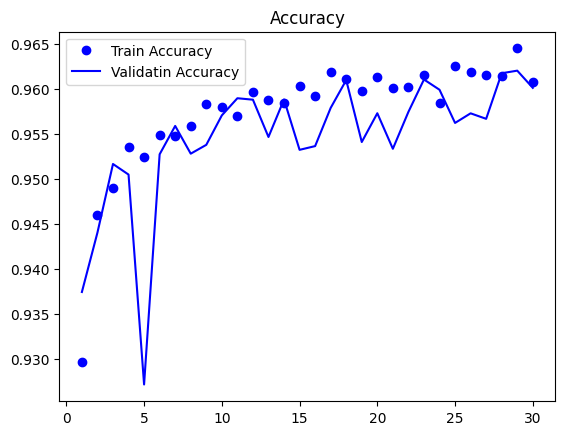

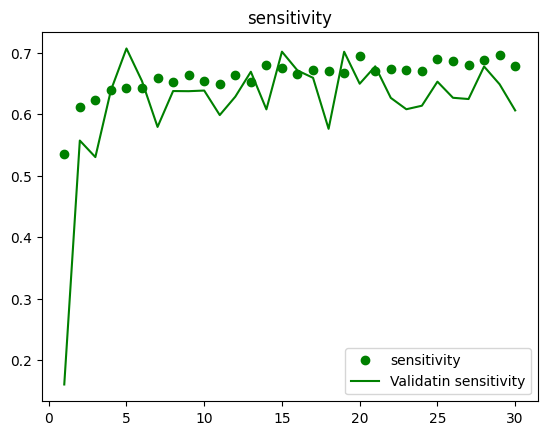

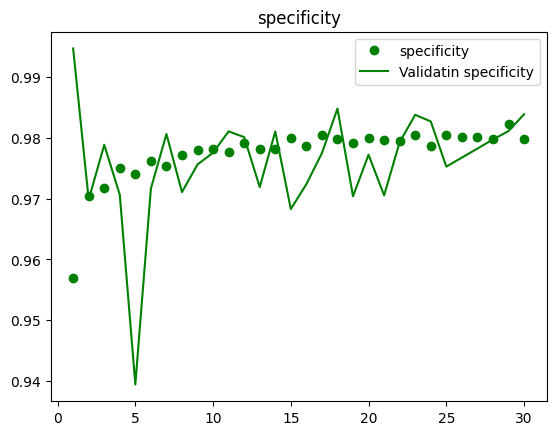

<Figure size 640x480 with 0 Axes>

In [4]:
check_result.plot_history(HISTORY_PATH)